In [10]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('seaborn-v0_8')

In [11]:
#Cargar el dataset
df = pd.read_csv(r"C:/Users/cecil/Downloads/Iris.csv")
df.head()


,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.describe()


,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
#Selección y escalado de características
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

explained_var, cum_var

(array([0.72770452, 0.23030523, 0.03683832, 0.00515193]),
 array([0.72770452, 0.95800975, 0.99484807, 1.        ]))

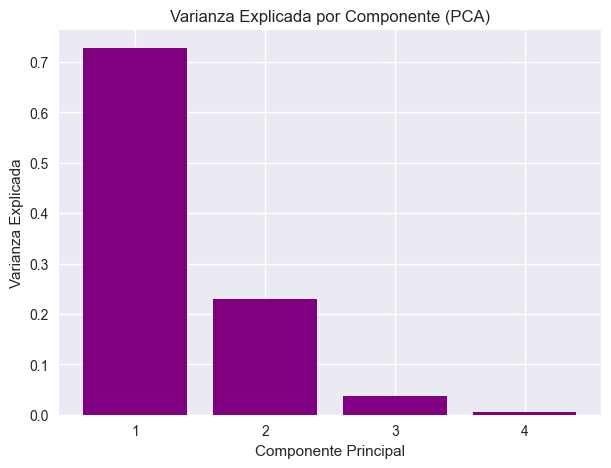

In [16]:
#Gráfica de varianza explicada
plt.figure(figsize=(7,5))
plt.bar(range(1,5), explained_var, color='purple')
plt.xlabel("Componente Principal")
plt.ylabel("Varianza Explicada")
plt.title("Varianza Explicada por Componente (PCA)")
plt.xticks(range(1,5))
plt.show()

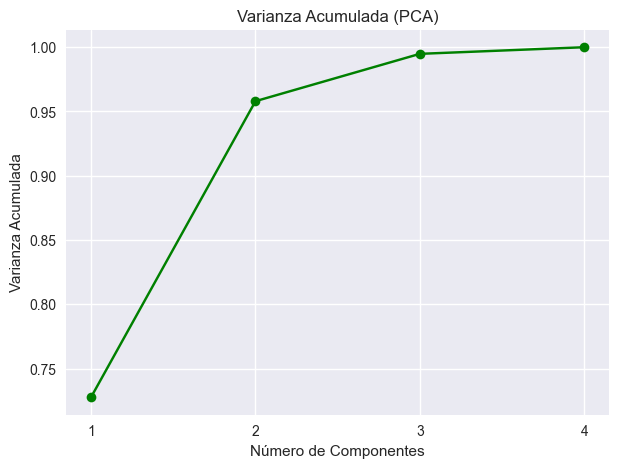

In [17]:
#Gráfica de varianza acumulada
plt.figure(figsize=(7,5))
plt.plot(range(1,5), cum_var, marker='o', color='green')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada (PCA)")
plt.grid(True)
plt.xticks(range(1,5))
plt.show()

In [19]:
#PCA con 2 componentes
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca['species'] = y
df_pca.head()

,PC1,PC2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


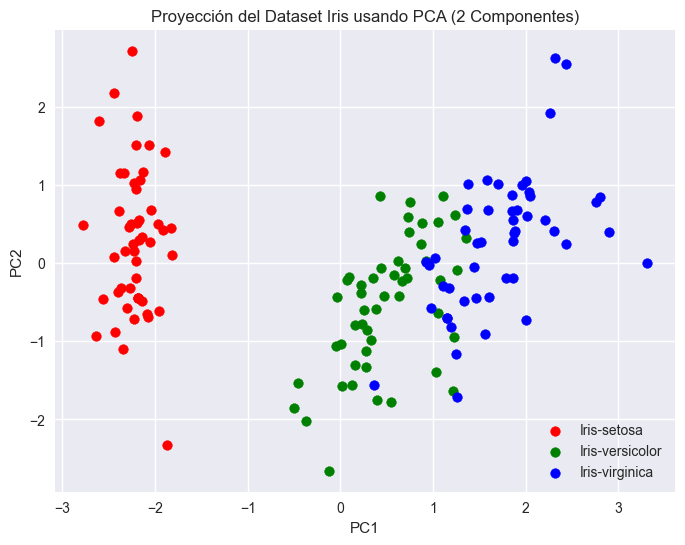

In [20]:
#Gráfica PCA 2D
plt.figure(figsize=(8,6))

colors = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}

for species in df_pca['species'].unique():
    subset = df_pca[df_pca['species']==species]
    plt.scatter(subset['PC1'], subset['PC2'],
                color=colors[species],
                label=species)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección del Dataset Iris usando PCA (2 Componentes)")
plt.legend()
plt.grid(True)
plt.show()